### Simple Linear Regression - From scratch

In [1]:
# import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# read data

data = pd.read_csv("..\\data\\real_estate_price_size.csv")
data

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
...,...,...
95,252460.400,549.80
96,310522.592,1037.44
97,383635.568,1504.75
98,225145.248,648.29


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   100 non-null    float64
 1   size    100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [4]:
# Split data

X_train,X_test,y_train,y_test = train_test_split(data['size'],
                                                 data['price'],
                                                 test_size= 0.1,
                                                 random_state= 0)

X_train.shape, X_test.shape

((90,), (10,))

In [5]:
class SLR:
    '''
    SLR Class with methods -
    1. init(for initilization), 
    2. fit(to learn parameters), 
    3. predict(to give predictions)
    '''
    def __init__(self):
        '''
        For initilization and storing the attributes for updation
        '''
        self.slope = None
        self.intercept = None

    def fit(self,X_train, y_train):
        '''
        Input: Independent variable and Dependent Variable
        Output: Learned value for slope and intercept
        '''
        numerator = 0 # for storing numerator value ([(Xi - x̄) x (yi - ȳ)])
        denominator = 0 # for storing denominator value [((Xi - x̄))^2]
        # loop to calculate values for slope
        for i in range(len(X_train)):
            numerator += (X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean())
            denominator += np.power(X_train[i] - X_train.mean(), 2)
        self.slope = numerator/denominator # ([(Xi - x̄)*(yi - ȳ)] / ((Xi - x̄)^2))
        self.intercept = y_train.mean() - (self.slope * X_train.mean()) # (y = mx + b so, (b = ȳ - (slope(m) * x̄)))
        
        print(f"Slope is {self.slope},\nIntercept is {self.intercept}")
        return self.slope, self.intercept

    def predict(self,X_test):
        '''
        Input: Data for which prediction to be done
        Output: Predicted value
        '''
        return (self.slope * X_test) + self.intercept # (y = mx + b)

In [6]:
# Temporary change for not resetting the index

X_train1 = X_train.values
X_test1 = X_test.values
y_train1 = y_train.values
y_test1 = y_test.values

In [7]:
# create instance for the class

ols = SLR()

In [8]:
# Storing the learnd parameters by calling the fit method

slope, intercept = ols.fit(X_train1, y_train1)
slope, intercept

Slope is 222.12419153148326,
Intercept is 100860.27621792973


(222.12419153148326, 100860.27621792973)

In [9]:
# Viewing the prediction for the data

print(f"Prediction by the model is {ols.predict(X_test1[0])}, \nOriginal value is {y_test1[0]}, \nError is {y_test1[0]-ols.predict(X_test1[0])}")

Prediction by the model is 227668.75592133822, 
Original value is 271793.312, 
Error is 44124.55607866176


In [10]:
# Manually calculation for prediction

prediction = (slope*X_train1) + intercept
prediction

array([262540.03274987, 255129.96972038, 252406.7271322 , 325039.11652108,
       238759.41680451, 325279.01064793, 369064.13128262, 217655.3973671 ,
       217655.3973671 , 252406.7271322 , 397196.16014008, 368657.64401212,
       435101.65342493, 243777.2022912 , 255967.37792245, 241507.09305375,
       227668.75592134, 257522.24726317, 252142.39934428, 363735.37192778,
       284814.64667664, 252142.39934428, 255129.96972038, 253121.96702893,
       327860.09375353, 397196.16014008, 252142.39934428, 330105.76932991,
       327860.09375353, 253121.96702893, 246622.61318472, 256014.02400267,
       283715.13192856, 252406.7271322 , 384170.79754868, 407329.46575775,
       239452.44428208, 327860.09375353, 253121.96702893, 228623.88994492,
       338877.45365349, 227286.7023119 , 243706.12254991, 291340.65542384,
       252142.39934428, 244685.69023457, 510126.3203566 , 239236.9838163 ,
       216005.01462402, 327860.09375353, 336391.88395025, 252142.39934428,
       325039.11652108, 3

In [11]:
# Model calculation of the predictions

model_predictions = ols.predict(X_train1)
model_predictions

array([262540.03274987, 255129.96972038, 252406.7271322 , 325039.11652108,
       238759.41680451, 325279.01064793, 369064.13128262, 217655.3973671 ,
       217655.3973671 , 252406.7271322 , 397196.16014008, 368657.64401212,
       435101.65342493, 243777.2022912 , 255967.37792245, 241507.09305375,
       227668.75592134, 257522.24726317, 252142.39934428, 363735.37192778,
       284814.64667664, 252142.39934428, 255129.96972038, 253121.96702893,
       327860.09375353, 397196.16014008, 252142.39934428, 330105.76932991,
       327860.09375353, 253121.96702893, 246622.61318472, 256014.02400267,
       283715.13192856, 252406.7271322 , 384170.79754868, 407329.46575775,
       239452.44428208, 327860.09375353, 253121.96702893, 228623.88994492,
       338877.45365349, 227286.7023119 , 243706.12254991, 291340.65542384,
       252142.39934428, 244685.69023457, 510126.3203566 , 239236.9838163 ,
       216005.01462402, 327860.09375353, 336391.88395025, 252142.39934428,
       325039.11652108, 3

In [12]:
# matching calculation for prediction (manually and by the model)

df = pd.DataFrame({'1': list(prediction), '2': list(model_predictions)})
df['diff'] = df['1'] - df['2']
df['diff'].sum()

0.0

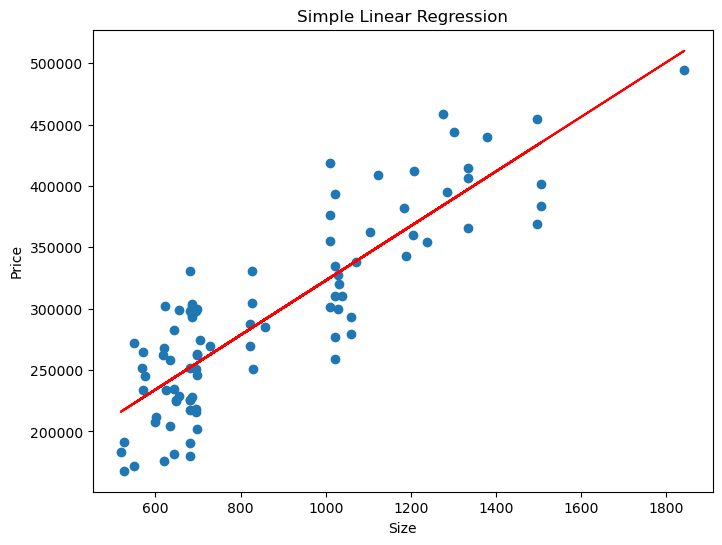

In [13]:
# Plotting the data for visuallisation for train data

plt.figure(figsize= (8,6))
plt.scatter(X_train1, y_train1)
plt.plot(X_train1,model_predictions, color= 'red') # Best fit line by ols
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Simple Linear Regression')
plt.show();

In [14]:
# Randomly checking the manual prediction

(slope*X_test1[5]) + intercept

255967.37792244917

In [15]:
y_test1[5], ((slope*X_test1[5]) + intercept) - y_test1[5]

(266684.248, -10716.870077550848)

In [16]:
# Randomly checking the model prediction

ols.predict(X_test1[5])

255967.37792244917

In [17]:
y_test1[5], ((ols.predict(X_test1[5])) - y_test1[5])

(266684.248, -10716.870077550848)

In [18]:
# Prediction for the test data

ols.predict(X_test1)

array([227668.75592134, 207424.35710516, 209099.17350931, 436010.14136829,
       253121.96702893, 255967.37792245, 254245.91543808, 222984.15672194,
       244685.69023457, 222984.15672194])

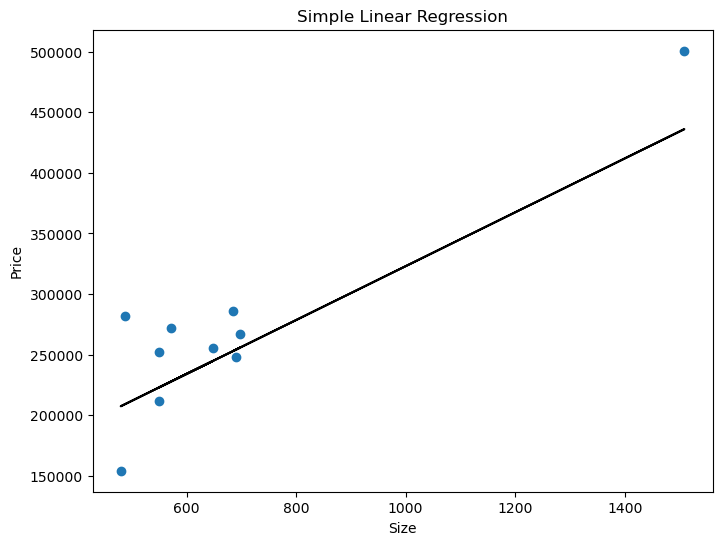

In [19]:
# Plotting the data for visuallisation for test data

plt.figure(figsize= (8,6))
plt.scatter(X_test1, y_test1)
plt.plot(X_test1,ols.predict(X_test1), color= 'black')
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Simple Linear Regression')
plt.show();

### Using sklearn

In [20]:
# create instance

lr = LinearRegression()
lr

LinearRegression()

In [25]:
# fit the model

lr.fit(pd.DataFrame(X_train), pd.DataFrame(y_train))

LinearRegression()

In [33]:
# learnt intercept

lr.intercept_, lr.coef_

(array([100860.27621793]), array([[222.12419153]]))

In [46]:
# predict for the test data by lr algo

lr.predict(pd.DataFrame(X_test))

[227668.75592133822,
 207424.35710515885,
 209099.17350930622,
 436010.14136829285,
 253121.9670289309,
 255967.37792244917,
 254245.91543808018,
 222984.15672193922,
 244685.69023456515,
 222984.15672193922]

In [48]:
# Comparing the ols vs linear regression algorithm

df1 = pd.DataFrame({'ols': ols.predict(X_test1), 'model': [i[0] for i in lr.predict(pd.DataFrame(X_test))]})

df1['error'] = round(df1['ols'],0) - round(df1['model'],0)
df1

,ols,model,error
0,227668.755921,227668.755921,0.0
1,207424.357105,207424.357105,0.0
2,209099.173509,209099.173509,0.0
3,436010.141368,436010.141368,0.0
4,253121.967029,253121.967029,0.0
5,255967.377922,255967.377922,0.0
6,254245.915438,254245.915438,0.0
7,222984.156722,222984.156722,0.0
8,244685.690235,244685.690235,0.0
9,222984.156722,222984.156722,0.0
